 ## EFFICIENT FRONTIER

In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

from scipy.stats import norm
from risk_kit import Metrics, pre_processing_ind
pd.options.display.float_format = '{:.6f}'.format

In [2]:
ind = pre_processing_ind()

In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.005600,-0.051900,0.012900,0.029300,0.109700,-0.004800,0.080800,0.017700,0.081400,0.003900,...,0.008300,0.092200,0.020600,0.077000,0.019300,-0.237900,0.000700,0.018700,0.003700,0.052000
1926-08,0.025900,0.270300,0.065000,0.005500,0.100100,-0.035800,-0.025100,0.042500,0.055000,0.081400,...,0.021700,0.020200,0.043900,-0.023800,0.048800,0.053900,-0.007500,-0.001300,0.044600,0.067600
1926-09,0.011600,0.040200,0.012600,0.065800,-0.009900,0.007300,-0.005100,0.006900,0.053300,0.023100,...,0.024100,0.022500,0.001900,-0.055400,0.000500,-0.078700,0.002500,-0.005600,-0.012300,-0.038600
1926-10,-0.030600,-0.033100,0.010600,-0.047600,0.094700,-0.046800,0.001200,-0.005700,-0.047600,0.010000,...,-0.001100,-0.020000,-0.010900,-0.050800,-0.026400,-0.153800,-0.022000,-0.041100,-0.051600,-0.084900
1926-11,0.063500,0.072900,0.045500,0.016600,-0.058000,-0.005400,0.018700,0.054200,0.052000,0.031100,...,0.016300,0.037700,0.036400,0.038400,0.016000,0.046700,0.065200,0.043300,0.022400,0.040000


In [4]:
metrics = Metrics()

max drawdown is -72.22% located at 1932-06



,Wealth,Peaks,Drawdown
1926-07,1.005600,1.005600,0.000000
1926-08,1.031645,1.031645,0.000000
1926-09,1.043612,1.043612,0.000000
1926-10,1.011678,1.043612,-0.030600
1926-11,1.075919,1.075919,0.000000
...,...,...,...
2018-08,12609.751105,13161.035989,-0.041888
2018-09,12569.399902,13161.035989,-0.044954
2018-10,12697.607781,13161.035989,-0.035212
2018-11,13042.982713,13161.035989,-0.008970


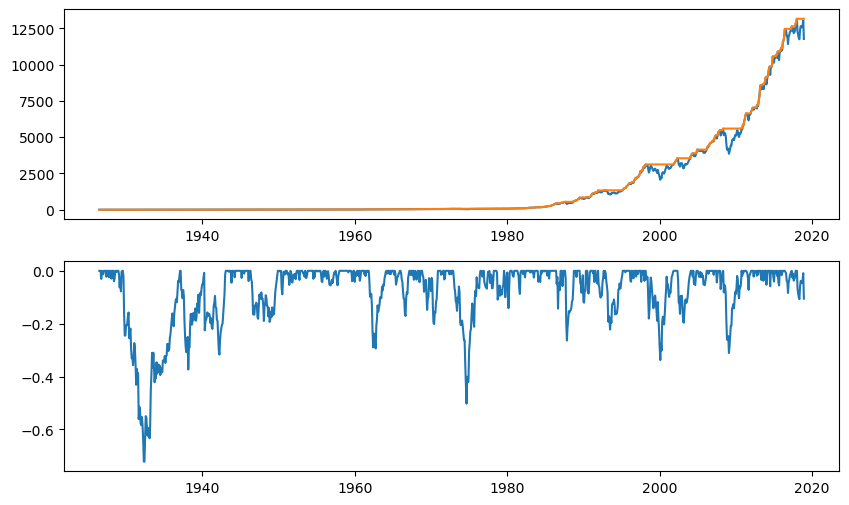

In [5]:
metrics.drawdown(ind["Food"])

In [6]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
data = []
for col in cols_of_interest:
    data.append(metrics.cornish_fisher_var(ind[col]))
    
print(pd.Series(index=cols_of_interest, data=data))

Food    0.061207
Smoke   0.080292
Coal    0.047359
Beer    0.033881
Fin     0.075199
dtype: float64


In [7]:
data = []
for col in ind.columns:
    data.append(metrics.cornish_fisher_var(ind[col]))
    
pd.Series(index=ind.columns, data=data).sort_values().head()

Beer    0.033881
Coal    0.047359
Food    0.061207
Telcm   0.064719
Hshld   0.064886
dtype: float64

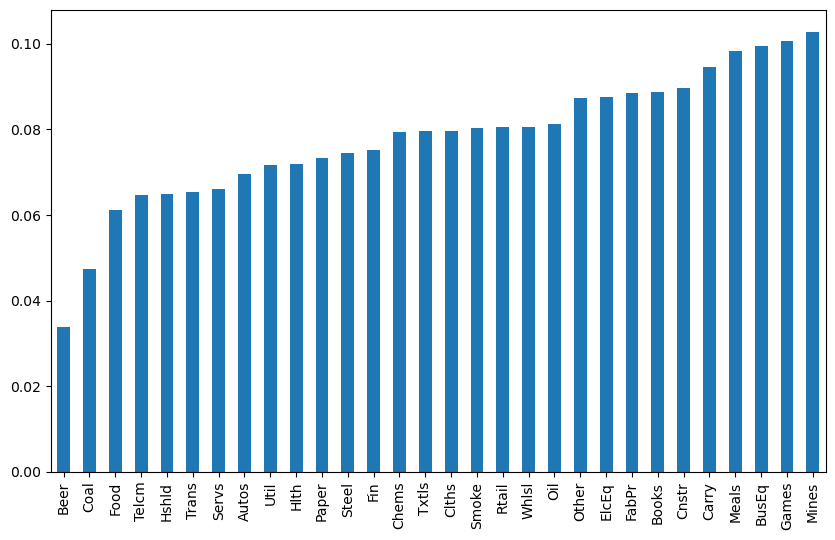

In [8]:
pd.Series(index=ind.columns, data=data).sort_values().plot.bar();

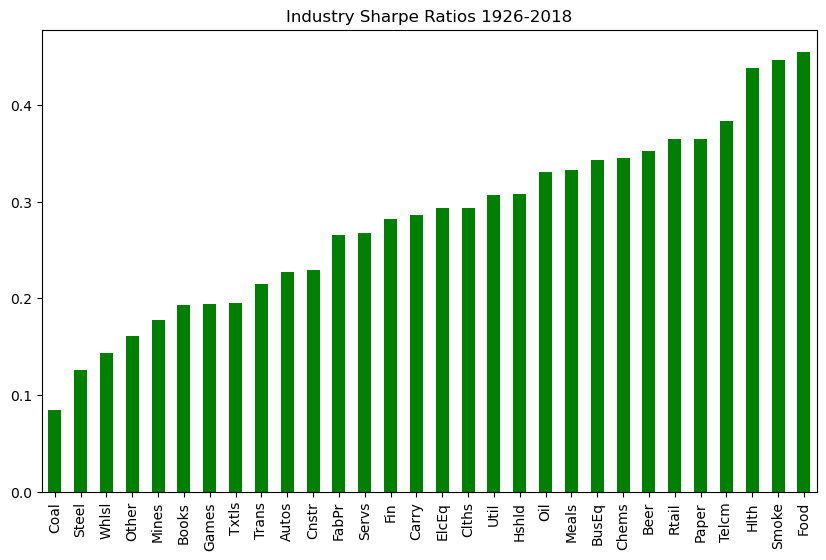

In [19]:
ind.agg(metrics.sharpe_ratio, riskfree_rate = 0.03, periods_per_year = 12).sort_values().\
        plot.bar(title = "Industry Sharpe Ratios 1926-2018", color = "green");

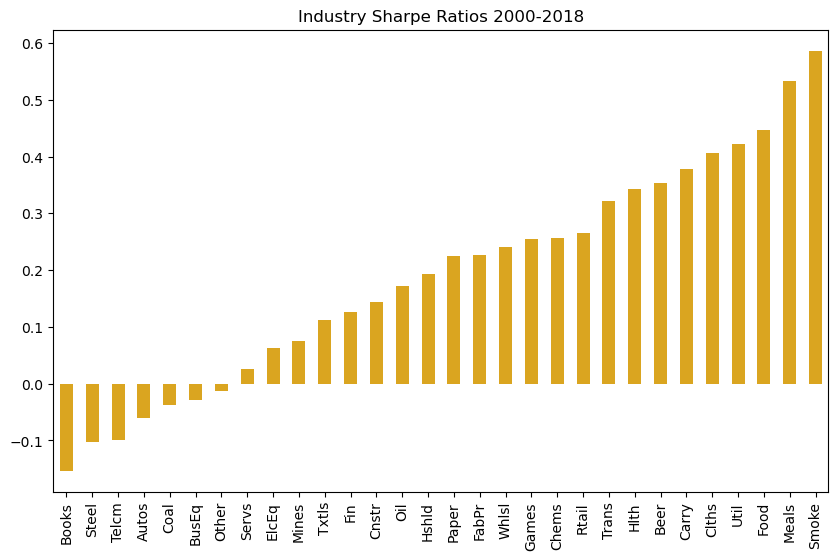

In [23]:
ind["2000":].agg(metrics.sharpe_ratio, riskfree_rate = 0.03, periods_per_year = 12).sort_values().\
        plot.bar(title = "Industry Sharpe Ratios 2000-2018", color = "goldenrod");

### What was the efficient frontier? (in-sample analysys) (NO Forecasting)

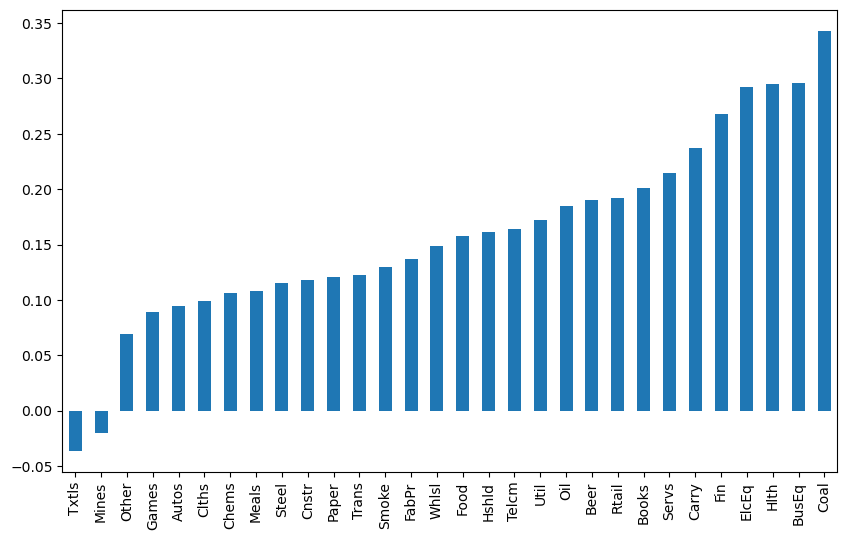

In [29]:
ind["1995": "2000"].agg(metrics.annualized_rets).sort_values().plot.bar();

In [31]:
# generater variance-covariance matrix
ind["1995": "2000"].cov().head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
